<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<p>Practical 2</p>
<hr>
<hr>

Write program for AdaGrad for objective function <br>1. x<sup>2</sup> <br>2. x<sup>2</sup> + y<sup>2</sup> 
<br><br>Plot the points in 2-D and 3-D gradient. <br>Show the execution steps on contours.
1. Iterative ploting of graph
2. Plot it meshgrid with contour
3. Gradient Threshold = 10^-8
4. Iteration = 50 (result obtained before 50 then stop).
<hr>

In [7]:
import numpy
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

### AdaGrad for objective function:  x<sup>2<sup>

In [8]:
# objective function
def objective(x):
    return x**2.0

# derivative of objective function
def derivative(x):
    return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    stop = 1.0
    history = 0
    epil = pow(10, -8)
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    while(stop != 0.0):
        for i in range(n_iter):
            # calculate gradient
            #print(i)
            gradient = derivative(solution)
            # history 
            history = history + (gradient**2)
            # take a step
            solution = solution - step_size/(numpy.sqrt(history+epil)) * gradient
            # evaluate candidate point
            solution_eval = objective(solution)
            #print(solution_eval)
            stop = numpy.round(solution_eval, 5)
            stop = float(stop)
            #print(stop)
            # store solution
            solutions.append(solution)
            scores.append(solution_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
            if stop == 0.0:
                break
    return [solutions, scores]

# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.2
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
#print(solutions, scores)

>0 f([-0.79977125]) = 0.63963
>1 f([-0.6748366]) = 0.45540
>2 f([-0.5815799]) = 0.33824
>3 f([-0.50700636]) = 0.25706
>4 f([-0.44517944]) = 0.19818
>5 f([-0.39278777]) = 0.15428
>6 f([-0.34774924]) = 0.12093
>7 f([-0.30864461]) = 0.09526
>8 f([-0.27444841]) = 0.07532
>9 f([-0.24438643]) = 0.05972
>10 f([-0.21785393]) = 0.04746
>11 f([-0.19436567]) = 0.03778
>12 f([-0.17352393]) = 0.03011
>13 f([-0.15499705]) = 0.02402
>14 f([-0.13850462]) = 0.01918
>15 f([-0.12380691]) = 0.01533
>16 f([-0.11069714]) = 0.01225
>17 f([-0.09899562]) = 0.00980
>18 f([-0.08854533]) = 0.00784
>19 f([-0.07920841]) = 0.00627
>20 f([-0.07086331]) = 0.00502
>21 f([-0.06340262]) = 0.00402
>22 f([-0.05673113]) = 0.00322
>23 f([-0.0507643]) = 0.00258
>24 f([-0.04542694]) = 0.00206
>25 f([-0.04065212]) = 0.00165
>26 f([-0.03638015]) = 0.00132
>27 f([-0.0325578]) = 0.00106
>28 f([-0.02913756]) = 0.00085
>29 f([-0.02607697]) = 0.00068
>30 f([-0.02333813]) = 0.00054
>31 f([-0.02088713]) = 0.00044
>32 f([-0.01869366]) =

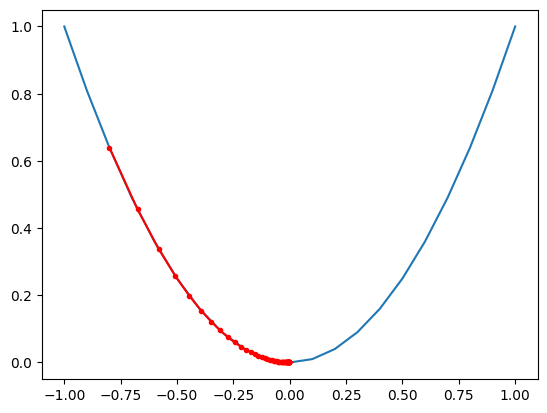

In [9]:
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [10]:
w = solutions.pop()
w1 = scores.pop()
#print(len(solutions))

In [ ]:
a = list()
b = list()
c = list()
d = list()

for i in range(len(results)):
    print(i)
    a.append(inputs[i])
    b.append(results[i])
    c.append(solutions[i])
    d.append(scores[i])
    pyplot.plot(a, b)
    pyplot.plot(c, d, '.-', color='green')
    pyplot.show()

### AdaGrad for objective function:  x<sup>2</sup> + y<sup>2</sup>

In [12]:
# objective function
def objective(x, y):
    return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

t = 0

# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
    stop = float(1)
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    while (stop != 0.0):
        for it in range(n_iter):
            # calculate gradient
            gradient = derivative(solution[0], solution[1])
            # update the sum of the squared partial derivatives
            for i in range(gradient.shape[0]):
                sq_grad_sums[i] += gradient[i]**2.0
            # build solution
            new_solution = list()
            for i in range(solution.shape[0]):
                # calculate the learning rate for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
                # calculate the new position in this variable
                value = solution[i] - alpha * gradient[i]
                new_solution.append(value)
            # store the new solution
            solution = asarray(new_solution)
            solutions.append(solution)
            # evaluate candidate point
            solution_eval = objective(solution[0], solution[1])
            # report progress
            print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
            stop = numpy.round(solution_eval, 5)
            stop = float(stop)
            global t
            t = i
            if stop == 0.0:
                break
    return solutions

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

In [15]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
solutions = np.array(solutions)
new = np.empty(shape=(50, 2), dtype='object')
for i in range(len(solutions)):
    print(i)
    new[i][0] = solutions[i][0]
    new[i][1] = solutions[i][1]
    pyplot.contourf(x, y, results, levels=50, cmap='jet')
    pyplot.plot(new[:,0], new[:,1], '.-', color='w')
    pyplot.show()

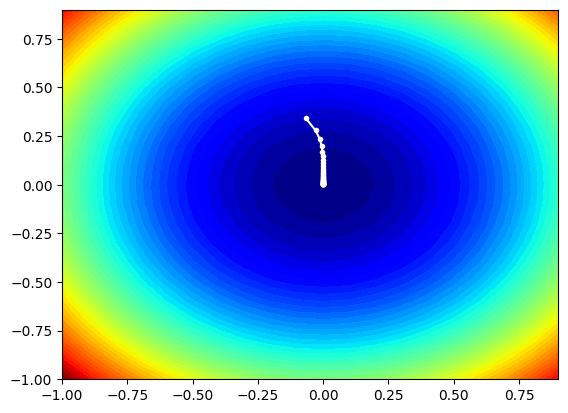

In [16]:
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()